# Soccer Player Overall Score  Prediction
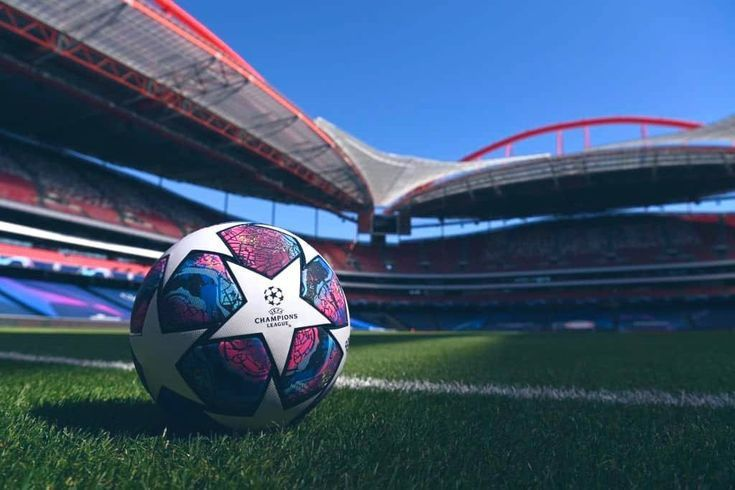\
**Team**

| Name | ID|
|------|------|
| Ramez Yousri Adli|191900043|
| Youstina Sherief| 191900072|
|Yehia Kareem|191900159|
|Zeyad Essam|191900141|








#Overview:

This model works on predicting the performance of football players for the upcoming season which is a critical aspect of modern sports analytics. Football teams, fantasy football enthusiasts, and fans alike are interested in understanding how a player's skills and abilities might evolve over time. Leveraging advanced statistical modeling techniques, and machine learning algorithms, predictive models can provide insights into potential player ratings for the next season.
# Problem Statement:

In the dynamic landscape of professional football, accurately predicting player performance for the upcoming season remains a difficult challenge. The lack of reliable forecasting tools affects decision-making processes for football clubs, fantasy football enthusiasts, and stakeholders invested in player development and team management. Consequently, there is a pressing need for a predictive model that integrates advanced statistical techniques, machine learning algorithms, and comprehensive data analytics to forecast football player ratings for the next season with a high degree of accuracy. This project aims to address this critical gap by developing an innovative predictive model capable of providing actionable insights into the future performance of football players.

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [3]:
#importing the data
df = pd.read_csv("/content/drive/MyDrive/Selected Topics Project/fifa_players.csv")
df.head(3)

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67


In [4]:
df.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

In [5]:
df.shape

(17954, 51)

In [6]:
df.dtypes

name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

In [7]:
df.dtypes[df.dtypes=='object'].index

Index(['name', 'full_name', 'birth_date', 'positions', 'nationality',
       'preferred_foot', 'body_type', 'national_team',
       'national_team_position'],
      dtype='object')

<Axes: xlabel='age', ylabel='overall_rating'>

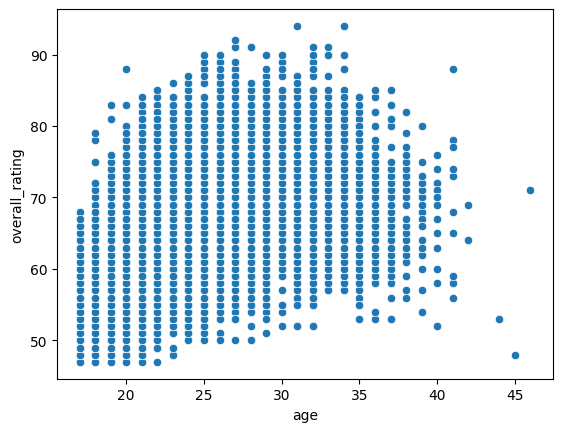

In [8]:
sns.scatterplot(x=df['age'],y=df['overall_rating'])

<Axes: xlabel='potential', ylabel='overall_rating'>

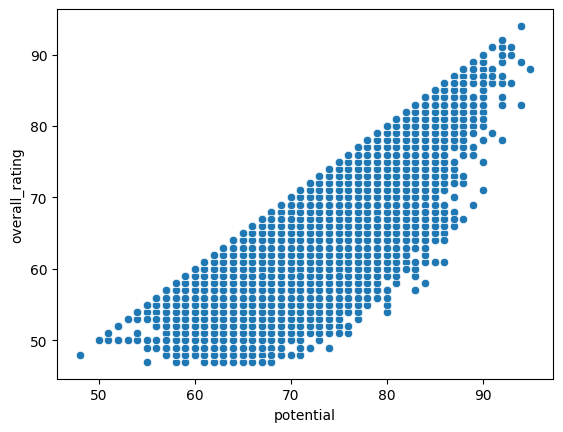

In [9]:
sns.scatterplot(x=df['potential'],y=df['overall_rating'])

<Axes: xlabel='wage_euro', ylabel='overall_rating'>

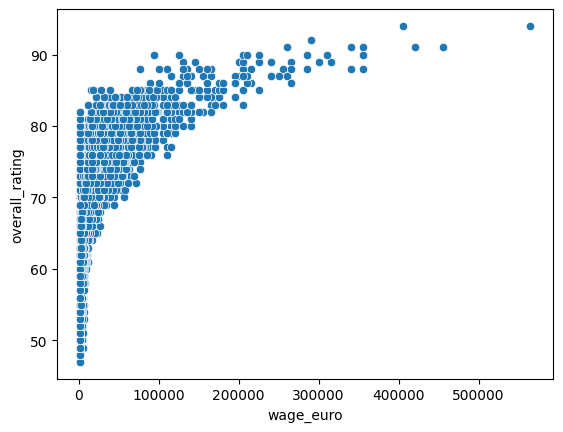

In [10]:
sns.scatterplot(x=df['wage_euro'],y=df['overall_rating'])

In [11]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


<Axes: xlabel='overall_rating'>

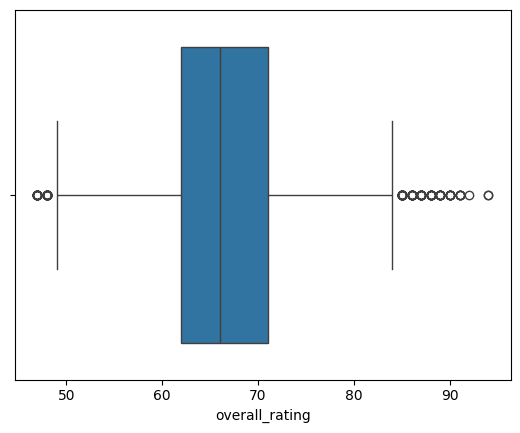

In [12]:
sns.boxplot(x=df['overall_rating'])

<Axes: xlabel='wage_euro'>

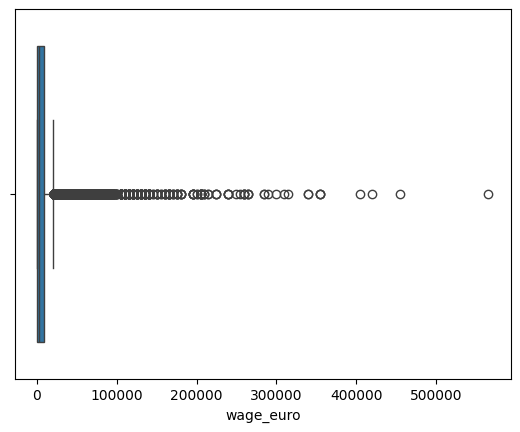

In [13]:
sns.boxplot(x=df['wage_euro'])

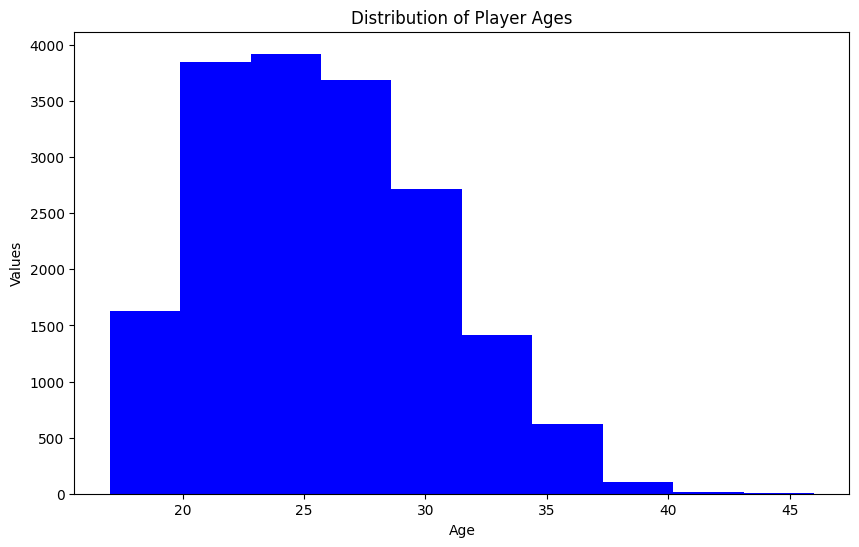

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=10, color='Blue')
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Distribution of Player Ages')
plt.show()

<ipython-input-15-93ba8f4bb44a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')


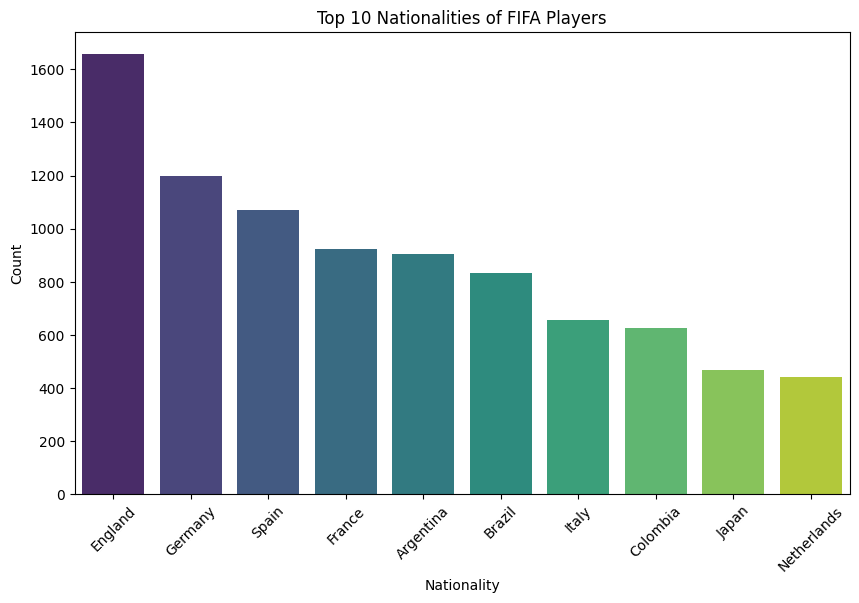

In [15]:
plt.figure(figsize=(10, 6))
nationality_counts = df['nationality'].value_counts().head(10)
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Top 10 Nationalities of FIFA Players')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-4b6a9a443fd2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='preferred_foot', y='overall_rating', data=df, palette='Pastel1')


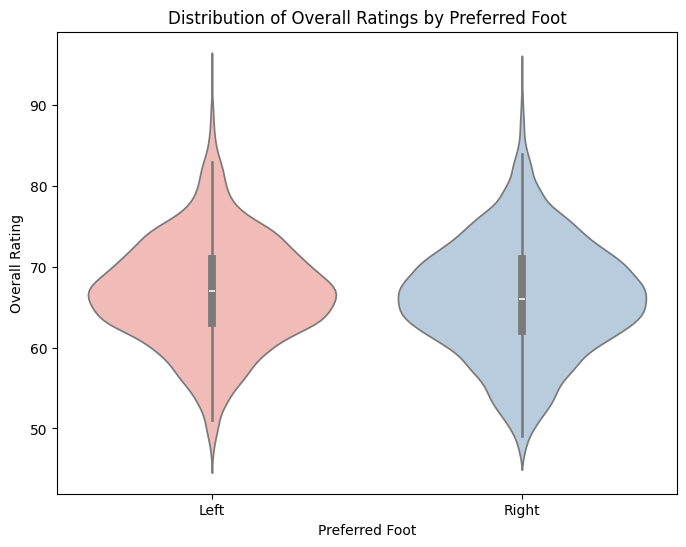

In [16]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='preferred_foot', y='overall_rating', data=df, palette='Pastel1')
plt.xlabel('Preferred Foot')
plt.ylabel('Overall Rating')
plt.title('Distribution of Overall Ratings by Preferred Foot')
plt.show()

<ipython-input-17-735a6bb306f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reputation_counts.index, y=reputation_counts.values, palette='coolwarm')


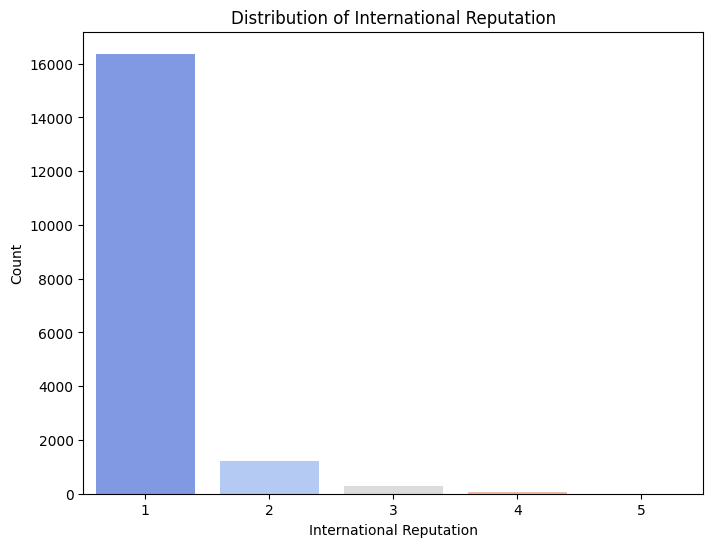

In [17]:
plt.figure(figsize=(8, 6))
reputation_counts = df['international_reputation(1-5)'].value_counts().sort_index()
sns.barplot(x=reputation_counts.index, y=reputation_counts.values, palette='coolwarm')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Distribution of International Reputation')
plt.show()

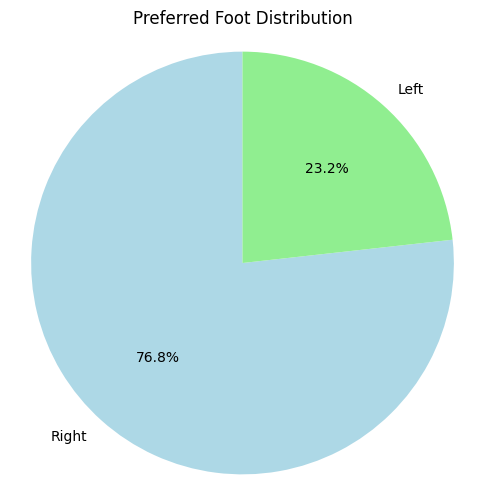

In [18]:
plt.figure(figsize=(6, 6))
foot_counts = df['preferred_foot'].value_counts()
colors = ['lightblue', 'lightgreen']
plt.pie(foot_counts.values, labels=foot_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Preferred Foot Distribution')
plt.axis('equal')
plt.show()

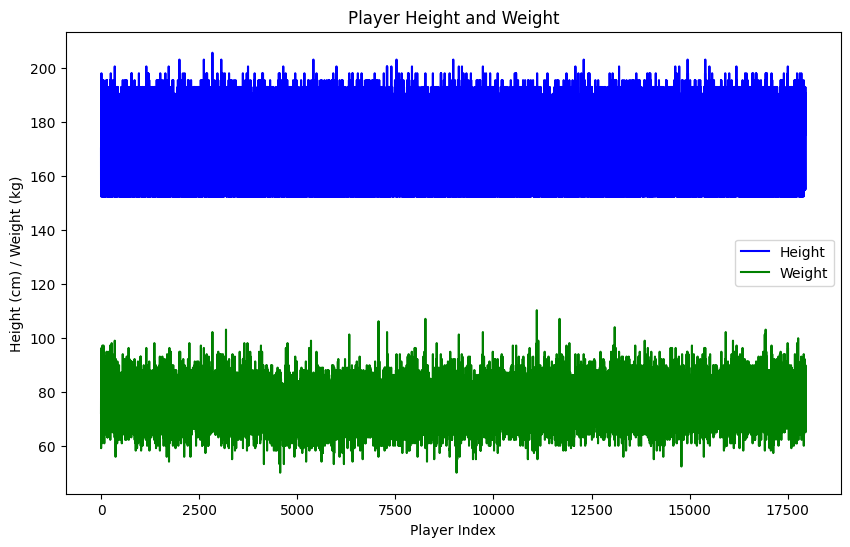

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['height_cm'], color='blue', label='Height')
plt.plot(df['weight_kgs'], color='green', label='Weight')
plt.xlabel('Player Index')
plt.ylabel('Height (cm) / Weight (kg)')
plt.title('Player Height and Weight')
plt.legend()
plt.show()

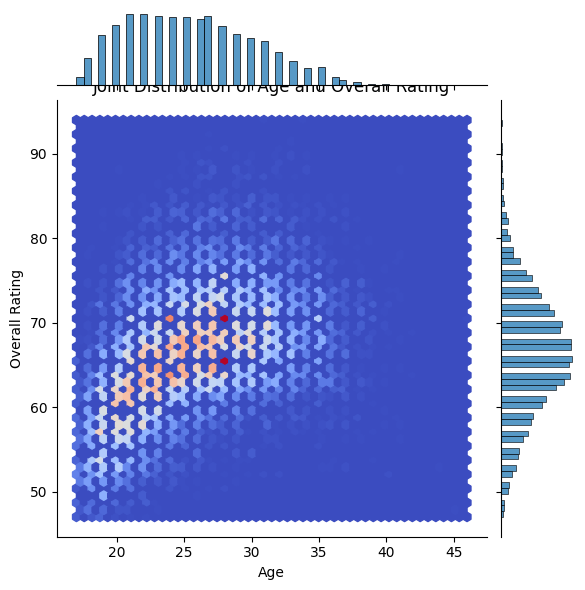

In [20]:
sns.jointplot(x='age', y='overall_rating', data=df, kind='hex', cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Joint Distribution of Age and Overall Rating')
plt.show()

<ipython-input-21-da15167c8ea2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='full_name', y='value_euro', data=top_10_value, palette='Blues_r')


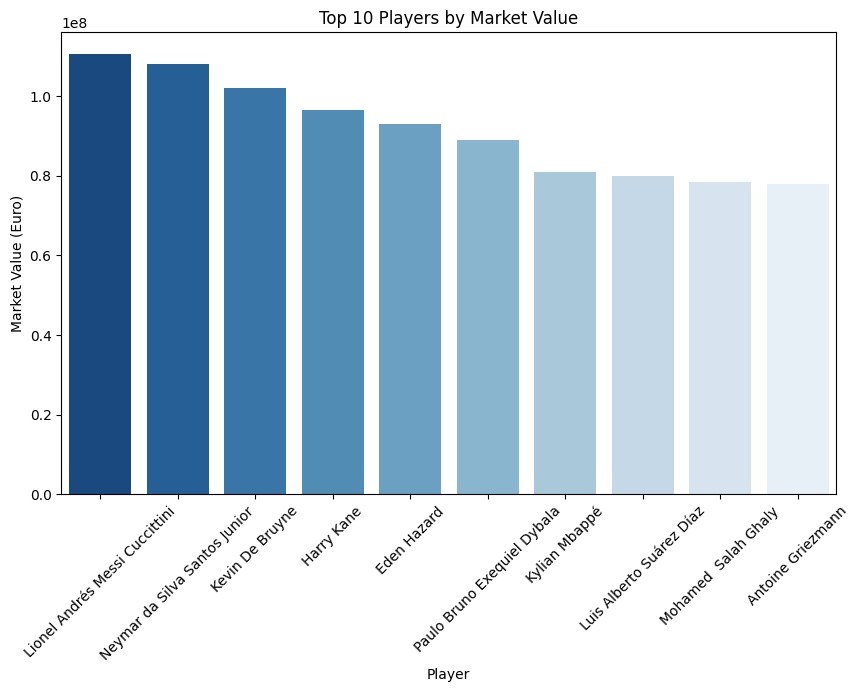

In [21]:
top_10_value = df.nlargest(10, 'value_euro')
plt.figure(figsize=(10, 6))
sns.barplot(x='full_name', y='value_euro', data=top_10_value, palette='Blues_r')
plt.xlabel('Player')
plt.ylabel('Market Value (Euro)')
plt.title('Top 10 Players by Market Value')
plt.xticks(rotation=45)
plt.show()

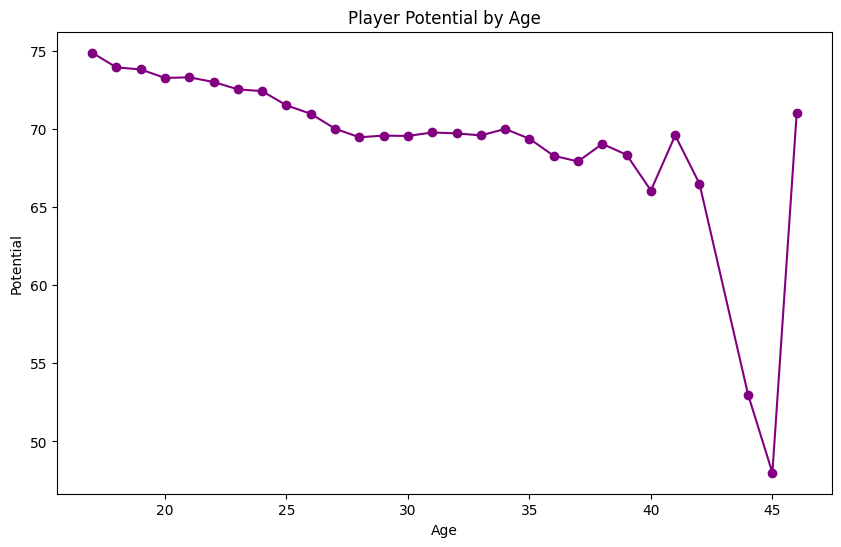

In [22]:
plt.figure(figsize=(10, 6))
age_potential = df.groupby('age')['potential'].mean()
plt.plot(age_potential.index, age_potential.values, color='purple', marker='o')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.title('Player Potential by Age')
plt.show()

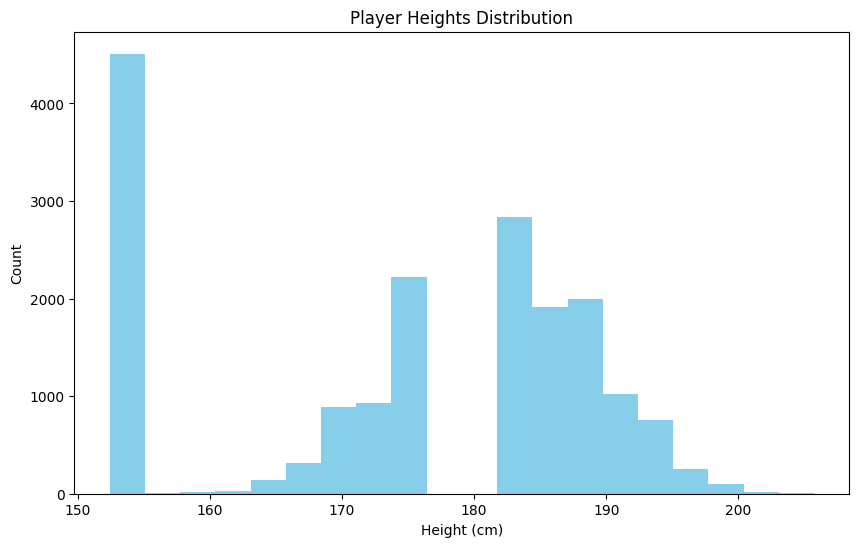

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['height_cm'], bins=20, color='skyblue')
plt.xlabel('Height (cm)')
plt.ylabel('Count')
plt.title('Player Heights Distribution')
plt.show()

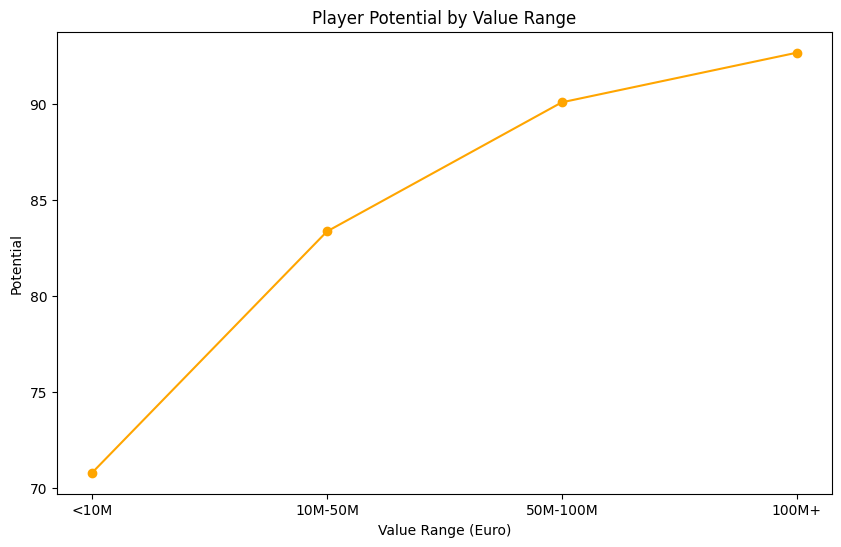

In [24]:
plt.figure(figsize=(10, 6))
value_ranges = pd.cut(df['value_euro'], bins=[0, 10_000_000, 50_000_000, 100_000_000, np.inf], labels=['<10M', '10M-50M', '50M-100M', '100M+'])
potential_by_value = df.groupby(value_ranges)['potential'].mean()
plt.plot(potential_by_value.index, potential_by_value.values, color='orange', marker='o')
plt.xlabel('Value Range (Euro)')
plt.ylabel('Potential')
plt.title('Player Potential by Value Range')
plt.show()

## Feature Engineering

In [25]:
df.drop(columns=['full_name', 'birth_date', 'body_type', 'national_rating', 'national_team_position', 'national_jersey_number'],inplace=True)


In [26]:
df.drop(columns=['name'],inplace=True)

In [27]:
df.head(3)

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67


### Encoding Positions

In [28]:
df['positions'].value_counts()

positions
CB              2243
GK              2065
ST              1747
CM               764
CDM,CM           709
                ... 
LB,LM,CB           1
CF,CM,ST           1
CB,ST              1
RB,ST              1
CAM,CM,RW,RM       1
Name: count, Length: 890, dtype: int64

In [29]:
df['positions']=df['positions'].str.split(',')
df.head(5)

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,31,170.18,72.1,"[CF, RW, ST]",Argentina,94,94,110500000.0,565000.0,Left,...,94,48,22,94,94,75,96,33,28,26
1,27,154.94,76.2,"[CAM, RM, CM]",Denmark,88,89,69500000.0,205000.0,Right,...,89,46,56,84,91,67,88,59,57,22
2,25,190.50,83.9,"[CM, CAM]",France,88,91,73000000.0,255000.0,Right,...,82,78,64,82,88,82,87,63,67,67
3,27,162.56,59.0,"[LW, ST]",Italy,88,88,62000000.0,165000.0,Right,...,84,34,26,83,87,61,83,51,24,22
4,27,187.96,88.9,[CB],Senegal,88,91,60000000.0,135000.0,Right,...,15,87,88,24,49,33,80,91,88,87


In [30]:
# dictionary
positions_mapping = {
    'GK': 'Goalkeeping',
    'CB': 'Defense',
    'RWB':'Defense',
    'LWB':'Defense',
    'RB': 'Defense',
    'LB': 'Defense',
    'CDM': 'Center ',
    'CM': 'Center ',
    'CAM': 'Center ',
    'LM': 'Center ',
    'RM': 'Center ',
    'ST': 'Attacker',
    'CF': 'Attacker',
    'LW': 'Attacker',
    'RW': 'Attacker'
}

# Example usage:
print(positions_mapping['GK'])  # Output: Goalkeeping
print(positions_mapping['CM'])  # Output: Center Midfield

df['positions'] = [[positions_mapping[val] for val in sublist]for sublist in df['positions']]
df_exploded = df.explode('positions')
df_enc = pd.get_dummies(df_exploded['positions'],prefix="Position")
print(df_enc.columns)
df = pd.concat([df,df_enc.groupby(level=0).max()],axis=1)
df

Goalkeeping
Center 
Index(['Position_Attacker', 'Position_Center ', 'Position_Defense',
       'Position_Goalkeeping'],
      dtype='object')


,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,vision,penalties,composure,marking,standing_tackle,sliding_tackle,Position_Attacker,Position_Center,Position_Defense,Position_Goalkeeping
0,31,170.18,72.1,"[Attacker, Attacker, Attacker]",Argentina,94,94,110500000.0,565000.0,Left,...,94,75,96,33,28,26,True,False,False,False
1,27,154.94,76.2,"[Center , Center , Center ]",Denmark,88,89,69500000.0,205000.0,Right,...,91,67,88,59,57,22,False,True,False,False
2,25,190.50,83.9,"[Center , Center ]",France,88,91,73000000.0,255000.0,Right,...,88,82,87,63,67,67,False,True,False,False
3,27,162.56,59.0,"[Attacker, Attacker]",Italy,88,88,62000000.0,165000.0,Right,...,87,61,83,51,24,22,True,False,False,False
4,27,187.96,88.9,[Defense],Senegal,88,91,60000000.0,135000.0,Right,...,49,33,80,91,88,87,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,"[Center , Center , Center ]",Scotland,67,70,975000.0,3000.0,Right,...,64,63,56,40,20,18,False,True,False,False
17950,23,182.88,79.8,[Defense],Slovakia,59,67,190000.0,1000.0,Left,...,39,32,52,53,64,60,False,False,True,False
17951,22,185.42,89.8,[Goalkeeping],Netherlands,59,67,170000.0,1000.0,Right,...,25,16,47,9,12,13,False,False,False,True
17952,21,175.26,64.9,"[Attacker, Center ]",Saudi Arabia,59,71,280000.0,4000.0,Right,...,52,50,53,16,18,17,True,True,False,False


In [31]:
# Some visualization
df_overallrating_positions = df.groupby(by='positions')
print(df_overallrating_positions)
#df_overallrating_positions['positions'] = df_overallrating_positions.explode('posiions')
#sns.barplot(x=df_overallrating_positions['positions'],y=df_overallrating_positions['overall_rating'])

### Encoding Nationalities and continents

In [32]:
#nationalities
df['nationality'].value_counts()

nationality
England                 1658
Germany                 1199
Spain                   1070
France                   925
Argentina                904
                        ... 
Papua New Guinea           1
South Sudan                1
Malta                      1
Yemen                      1
United Arab Emirates       1
Name: count, Length: 160, dtype: int64

In [33]:
nations_and_continents = {
    'A':'Unknown',
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo, Democratic Republic of the': 'Africa',
    'Congo, Republic of the': 'Africa',
    'Costa Rica': 'North America',
    'Cote d\'Ivoire': 'Africa',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia/Europe',
    'Czech Republic': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia/Europe',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Korea, North': 'Asia',
    'Korea, South': 'Asia',
    'Kosovo': 'Europe',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Liechtenstein': 'Europe',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Oceania',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar (Burma)': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe/Asia',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Europe/Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Vatican City': 'Europe',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Example usage:
print(nations_and_continents['France'])  # Output: Europe
print(nations_and_continents['Argentina'])  # Output: South America

df['nationality'] = df['nationality'].map(nations_and_continents)


Europe
South America


In [34]:
df['nationality'].value_counts()

nationality
Europe           7819
South America    3116
Africa           1004
Asia              901
North America     860
Europe/Asia       353
Oceania           279
Asia/Europe        37
Name: count, dtype: int64

In [35]:
nationalities = df['nationality'].value_counts()
nationalities = pd.DataFrame({'Continent':nationalities.index,'Count':nationalities.values})
nationalities

,Continent,Count
0,Europe,7819
1,South America,3116
2,Africa,1004
3,Asia,901
4,North America,860
5,Europe/Asia,353
6,Oceania,279
7,Asia/Europe,37


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'South America'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'Asia'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'Europe/Asia'),
  Text(6, 0, 'Oceania'),
  Text(7, 0, 'Asia/Europe')])

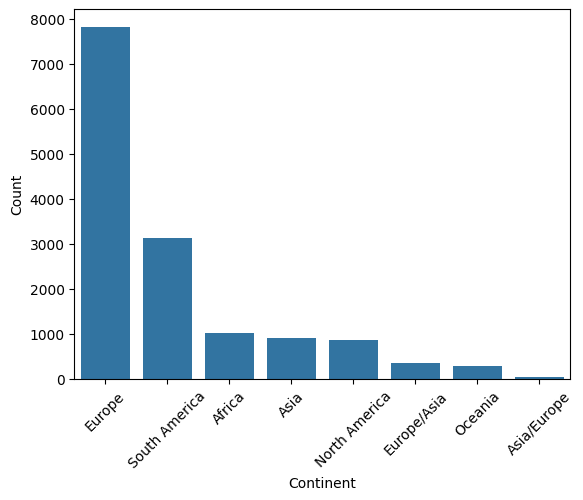

In [36]:

sns.barplot(x=nationalities['Continent'],y=nationalities['Count'])
plt.xticks(rotation=45)

In [37]:
groups_nationalities = df.groupby('nationality')['wage_euro'].mean().reset_index()
groups_nationalities

,nationality,wage_euro
0,Africa,11425.925926
1,Asia,4810.562572
2,Asia/Europe,4378.378378
3,Europe,11144.498967
4,Europe/Asia,9398.255814
5,North America,6852.975496
6,Oceania,3895.522388
7,South America,11411.377836


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Asia/Europe'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'Europe/Asia'),
  Text(5, 0, 'North America'),
  Text(6, 0, 'Oceania'),
  Text(7, 0, 'South America')])

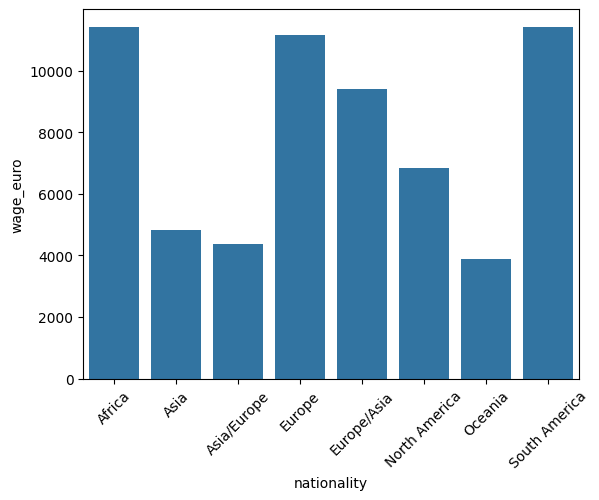

In [38]:
sns.barplot(x=groups_nationalities['nationality'],y=groups_nationalities['wage_euro'])
plt.xticks(rotation=45)

In [39]:
df['nationality'].shape

(17954,)

In [40]:
#one hot encoding
df_conts = pd.get_dummies(df['nationality'])
df_conts

,Africa,Asia,Asia/Europe,Europe,Europe/Asia,North America,Oceania,South America
0,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
17949,False,False,False,False,False,False,False,False
17950,False,False,False,True,False,False,False,False
17951,False,False,False,True,False,False,False,False
17952,False,True,False,False,False,False,False,False


In [41]:
df = pd.concat([df,df_conts],axis=1)
df.head(3)

,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,...,Position_Defense,Position_Goalkeeping,Africa,Asia,Asia/Europe,Europe,Europe/Asia,North America,Oceania,South America
0,31,170.18,72.1,"[Attacker, Attacker, Attacker]",South America,94,94,110500000.0,565000.0,Left,...,False,False,False,False,False,False,False,False,False,True
1,27,154.94,76.2,"[Center , Center , Center ]",Europe,88,89,69500000.0,205000.0,Right,...,False,False,False,False,False,True,False,False,False,False
2,25,190.50,83.9,"[Center , Center ]",Europe,88,91,73000000.0,255000.0,Right,...,False,False,False,False,False,True,False,False,False,False


## Correlations and Heatmap

In [42]:
df = df.drop(columns=['positions','nationality','preferred_foot','national_team'])
df

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,Position_Defense,Position_Goalkeeping,Africa,Asia,Asia/Europe,Europe,Europe/Asia,North America,Oceania,South America
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,False,False,False,False,False,False,False,False,False,True
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,False,False,False,False,False,True,False,False,False,False
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,False,False,False,False,False,True,False,False,False,False
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,False,False,False,False,False,True,False,False,False,False
4,27,187.96,88.9,88,91,60000000.0,135000.0,3,3,2,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,67,70,975000.0,3000.0,1,3,3,...,False,False,False,False,False,False,False,False,False,False
17950,23,182.88,79.8,59,67,190000.0,1000.0,1,3,2,...,True,False,False,False,False,True,False,False,False,False
17951,22,185.42,89.8,59,67,170000.0,1000.0,1,1,1,...,False,True,False,False,False,True,False,False,False,False
17952,21,175.26,64.9,59,71,280000.0,4000.0,1,4,3,...,False,False,False,True,False,False,False,False,False,False


<Axes: >

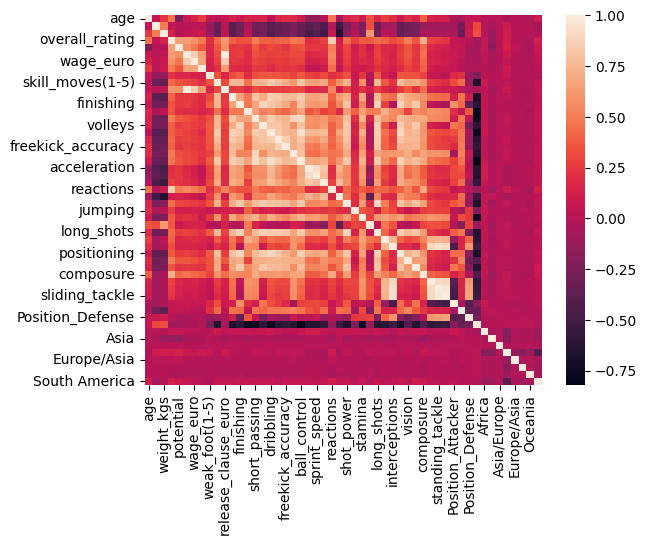

In [43]:
sns.heatmap(df.corr())

In [49]:
df = df.dropna()

# Regression


In [50]:
X = df.drop(columns=['overall_rating'])
y = df['overall_rating']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2)

In [52]:
X_train.shape

(12893, 51)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [55]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [56]:
normalized_df = scaler.fit_transform(df)

In [57]:
normalized_df

array([[0.48275862, 0.33333333, 0.3681592 , ..., 0.        , 0.        ,
        1.        ],
       [0.34482759, 0.04761905, 0.43615257, ..., 0.        , 0.        ,
        0.        ],
       [0.27586207, 0.71428571, 0.56384743, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17241379, 0.61904762, 0.66169154, ..., 0.        , 0.        ,
        0.        ],
       [0.13793103, 0.42857143, 0.24875622, ..., 0.        , 0.        ,
        0.        ],
       [0.06896552, 0.71428571, 0.49585406, ..., 0.        , 0.        ,
        1.        ]])

In [58]:
y = df['overall_rating']
X = df.drop(columns=['overall_rating'])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [62]:
preds = reg_model.predict(X_test)

In [63]:
mse  = mean_squared_error(y_test,preds)
print("MSE:",mse)
r2 = r2_score(y_test,preds)
print("R2:",r2)

MSE: 3.4370977531961673
R2: 0.9305992711749442


In [65]:
normalized_X = scaler.fit_transform(X)
#normalized_y = scaler.fit_transform(y)
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size=0.2)
reg_model2 = LinearRegression()
reg_model2.fit(X_train,y_train)
preds = reg_model2.predict(X_test)
mse  = mean_squared_error(y_test,preds)
print("MSE:",mse)
r2  = r2_score(y_test,preds)
print("R2:",r2)

MSE: 3.491815036447197
R2: 0.9296516814199135


In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X':[True,False],
    'positive':[True,False]# whether to calculate the intercept for this model       # whether to normalize the features
    # add more hyperparameters to search here...
}

# Create GridSearchCV object
grid_search = GridSearchCV(reg_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [67]:
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)

Mean Squared Error on test set: 3.491815036447197


In [68]:
normalized_X = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Reshape y to a 2D array for MinMaxScaler
X_train, X_test , y_train,y_test = train_test_split(normalized_X,y_scaled,test_size=0.2)
reg_model3 = LinearRegression()
reg_model3.fit(X_train,y_train)
preds = reg_model3.predict(X_test)
mse  = mean_squared_error(y_test,preds)
print(mse)
r2  = r2_score(y_test,preds)
print(r2)


#Searching for best model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X':[True,False],
    'positive':[True,False]# whether to calculate the intercept for this model       # whether to normalize the features
    # add more hyperparameters to search here...
}

# Create GridSearchCV object
grid_search = GridSearchCV(reg_model3, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set:", mse)
r2  = r2_score(y_test,preds)
print("R2:",r2)

0.0015247834280895255
0.9322077920658106
Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Mean Squared Error on test set: 0.0015247834280895255
R2: 0.9322077920658106


In [69]:
# Some more EDA
print(df.corr())

                                    age  height_cm  weight_kgs  \
age                            1.000000   0.063131    0.235998   
height_cm                      0.063131   1.000000    0.495473   
weight_kgs                     0.235998   0.495473    1.000000   
overall_rating                 0.473947   0.038278    0.149928   
potential                     -0.243079   0.006175   -0.016950   
value_euro                     0.080068   0.010780    0.041337   
wage_euro                      0.155849   0.020571    0.061791   
international_reputation(1-5)  0.256262   0.028759    0.083161   
weak_foot(1-5)                 0.065853  -0.136055   -0.133518   
skill_moves(1-5)               0.041770  -0.321838   -0.358384   
release_clause_euro            0.064120   0.011440    0.037207   
crossing                       0.143784  -0.390395   -0.395772   
finishing                      0.087029  -0.300228   -0.300376   
heading_accuracy               0.160892  -0.051708    0.018171   
short_pass

# Clustering

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import (
    DBSCAN,
    KMeans,
    AgglomerativeClustering,
    MeanShift,
)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
    rand_score,
    fowlkes_mallows_score,
)

In [71]:
Y = df['overall_rating']
X = df.drop(columns=['overall_rating'],axis=1)
X

,age,height_cm,weight_kgs,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),release_clause_euro,...,Position_Defense,Position_Goalkeeping,Africa,Asia,Asia/Europe,Europe,Europe/Asia,North America,Oceania,South America
0,31,170.18,72.1,94,110500000.0,565000.0,5,4,4,226500000.0,...,False,False,False,False,False,False,False,False,False,True
1,27,154.94,76.2,89,69500000.0,205000.0,3,5,4,133800000.0,...,False,False,False,False,False,True,False,False,False,False
2,25,190.50,83.9,91,73000000.0,255000.0,4,4,5,144200000.0,...,False,False,False,False,False,True,False,False,False,False
3,27,162.56,59.0,88,62000000.0,165000.0,3,4,4,105400000.0,...,False,False,False,False,False,True,False,False,False,False
4,27,187.96,88.9,91,60000000.0,135000.0,3,3,2,106500000.0,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,70,975000.0,3000.0,1,3,3,1800000.0,...,False,False,False,False,False,False,False,False,False,False
17950,23,182.88,79.8,67,190000.0,1000.0,1,3,2,295000.0,...,True,False,False,False,False,True,False,False,False,False
17951,22,185.42,89.8,67,170000.0,1000.0,1,1,1,289000.0,...,False,True,False,False,False,True,False,False,False,False
17952,21,175.26,64.9,71,280000.0,4000.0,1,4,3,532000.0,...,False,False,False,True,False,False,False,False,False,False


In [72]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.cluster import rand_score, fowlkes_mallows_score
import pandas as pd



# Initialize the DataFrame to store evaluation results
pred_df = pd.DataFrame(columns=["Algorithm", "Metric", "Score"])

# Define clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)

# Evaluate clustering algorithms with three evaluation metrics
labels = {
    "K-Means": kmeans.fit_predict(X),
}

metrics = {
    "Silhouette Score": silhouette_score,
    "Calinski Harabasz Score": calinski_harabasz_score,
    "Davies Bouldin Score": davies_bouldin_score,
    "Rand Score": rand_score,
    "Fowlkes-Mallows Score": fowlkes_mallows_score,
}

print("Done")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done


In [73]:
print("Silhouette:",silhouette_score(X,labels['K-Means']))
print("CH:",calinski_harabasz_score(X,labels['K-Means']))
print("DB:",davies_bouldin_score(X,labels['K-Means']))
print("Rand:",rand_score(Y,labels['K-Means']))
print("FM:",fowlkes_mallows_score(Y,labels['K-Means']))

Silhouette: 0.8308898393138933
CH: 32022.36024836396
DB: 0.5010798439579145
Rand: 0.21278392047307698
FM: 0.21526852119472387


In [74]:
k_df = pd.DataFrame(columns = ['Num_Clusters', 'Random_State','silhouette_score','CH_Score','DB_Score','rand_score','FM_score'])
k_df.head(5)

,Num_Clusters,Random_State,silhouette_score,CH_Score,DB_Score,rand_score,FM_score


In [75]:
for n in range(3,10):
  kmeans = KMeans(n_clusters=n, random_state=42)
  pred = kmeans.fit_predict(X)
  s = silhouette_score(X,pred)
  ch = calinski_harabasz_score(X,pred)
  db = davies_bouldin_score(X,pred)
  r = rand_score(Y,pred)
  fm = fowlkes_mallows_score(Y,pred)
  dic = {
          "Num_Clusters": n,
          "Random_State":42,
          'silhouette_score':s,'CH_Score':ch,'DB_Score':db,'rand_score':r,'FM_score':fm

      }
  #k_df = pd.concat([k_df,pd.DataFrame(dic)],ignore_index=True)
  k_df= k_df._append( dic
      ,ignore_index=True)
  print(f"{n} is done")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 is done


In [76]:
k_df

,Num_Clusters,Random_State,silhouette_score,CH_Score,DB_Score,rand_score,FM_score
0,3.0,42.0,0.830890,32022.360248,0.501080,0.212784,0.215269
1,4.0,42.0,0.812317,43310.182459,0.477674,0.272139,0.221303
2,5.0,42.0,0.790062,49767.519805,0.506250,0.319815,0.224352
3,6.0,42.0,0.768420,55335.934884,0.526437,0.361939,0.226550
4,7.0,42.0,0.736848,62895.548737,0.530010,0.432252,0.231229
5,8.0,42.0,0.736680,71091.088177,0.533274,0.432549,0.231068
6,9.0,42.0,0.718306,77481.094862,0.530524,0.459973,0.232592


<Axes: xlabel='Num_Clusters', ylabel='silhouette_score'>

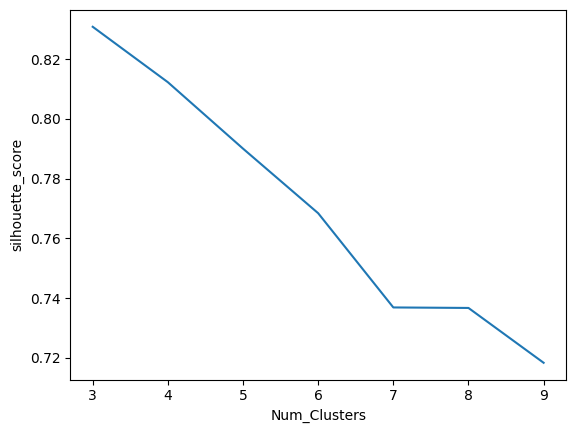

In [77]:
sns.lineplot(x=k_df['Num_Clusters'],y=k_df['silhouette_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

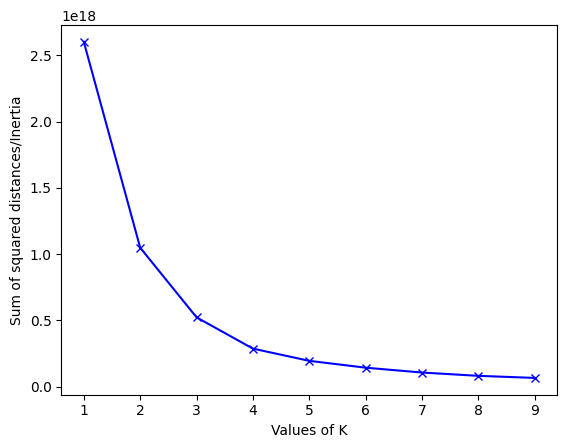

In [78]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')

plt.show()

In [79]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [80]:
cluster_labels = kmeans.labels_
print(cluster_labels)

[2 2 2 ... 0 0 0]


In [81]:
print(len(cluster_labels))

16117


In [82]:
df['Clusters'] = cluster_labels

<ipython-input-82-f867e2bf78a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clusters'] = cluster_labels


In [83]:
df.head(5)

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,Position_Goalkeeping,Africa,Asia,Asia/Europe,Europe,Europe/Asia,North America,Oceania,South America,Clusters
0,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,4,...,False,False,False,False,False,False,False,False,True,2
1,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,4,...,False,False,False,False,True,False,False,False,False,2
2,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,5,...,False,False,False,False,True,False,False,False,False,2
3,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,4,...,False,False,False,False,True,False,False,False,False,2
4,27,187.96,88.9,88,91,60000000.0,135000.0,3,3,2,...,False,True,False,False,False,False,False,False,False,2


In [84]:
print("Unique values:",df['Clusters'].unique())
cluster_counts = df['Clusters'].value_counts()
print(cluster_counts)
counts_df = cluster_counts.reset_index()
counts_df.columns = ['Cluster', 'Count']
counts_df

Unique values: [2 1 0]
Clusters
0    14575
1     1402
2      140
Name: count, dtype: int64


,Cluster,Count
0,0,14575
1,1,1402
2,2,140


<Axes: xlabel='Cluster', ylabel='Count'>

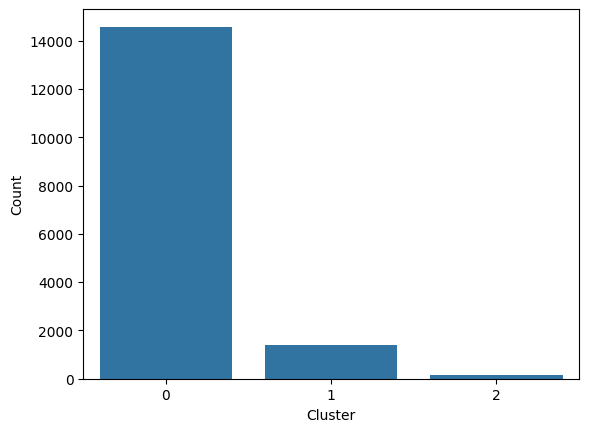

In [85]:
sns.barplot(x=counts_df['Cluster'],y=counts_df['Count'])

# Classification

In [86]:
# Using a decision tree
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [87]:
X= df.drop(columns=['Clusters'],axis=1)
Y = df['Clusters']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[3628,    1,    0],
       [   5,  363,    4],
       [   0,    1,   28]])

In [89]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, dtree_predictions)
print("Acc:",accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, dtree_predictions, average='weighted')
recall = recall_score(y_test, dtree_predictions, average='weighted')
f1 = f1_score(y_test, dtree_predictions, average='weighted')
print("Precision:",precision)
print("Recall:",recall)
print("F1:",f1)

Acc: 0.9972704714640198
Precision: 0.9973553719423889
Recall: 0.9972704714640198
F1: 0.9972884279034856


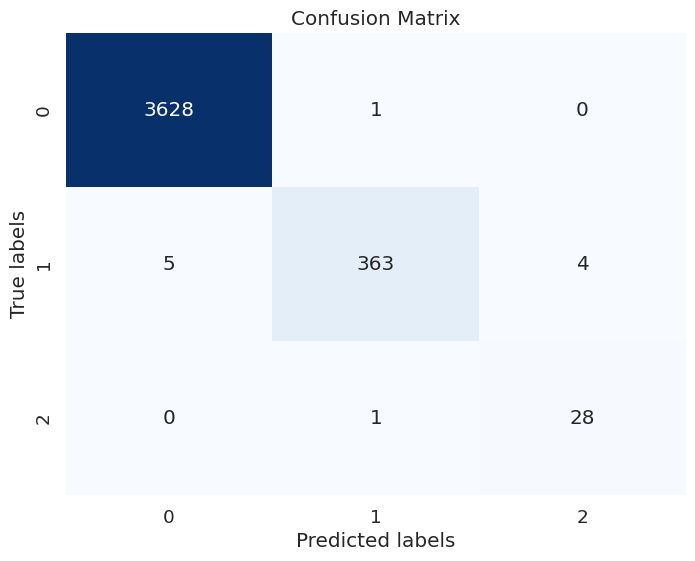

In [90]:
num_classes = cm.shape[0]
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


# Additional Experiments

In [91]:
k_df_samples = pd.DataFrame(columns = ['Num_Clusters', 'Random_State','silhouette_score','CH_Score','DB_Score','rand_score','FM_score'])
for n in range(1,60,5):
  kmeans = KMeans(n_clusters=3, random_state=n)
  pred = kmeans.fit_predict(X)
  s = silhouette_score(X,pred)
  ch = calinski_harabasz_score(X,pred)
  db = davies_bouldin_score(X,pred)
  r = rand_score(Y,pred)
  fm = fowlkes_mallows_score(Y,pred)
  dic = {
          "Num_Clusters": 3,
          "Random_State":n,
          'silhouette_score':s,'CH_Score':ch,'DB_Score':db,'rand_score':r,'FM_score':fm

      }
  #k_df = pd.concat([k_df,pd.DataFrame(dic)],ignore_index=True)
  k_df_samples= k_df_samples._append( dic
      ,ignore_index=True)
  print(f"{n} is done")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


11 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


21 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


26 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


31 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


36 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


41 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


46 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


51 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


56 is done


In [92]:
k_df_samples

,Num_Clusters,Random_State,silhouette_score,CH_Score,DB_Score,rand_score,FM_score
0,3.0,1.0,0.83089,32022.360248,0.50108,1.0,1.0
1,3.0,6.0,0.83089,32022.360248,0.50108,1.0,1.0
2,3.0,11.0,0.83089,32022.360248,0.50108,1.0,1.0
3,3.0,16.0,0.83089,32022.360248,0.50108,1.0,1.0
4,3.0,21.0,0.83089,32022.360248,0.50108,1.0,1.0
5,3.0,26.0,0.83089,32022.360248,0.50108,1.0,1.0
6,3.0,31.0,0.83089,32022.360248,0.50108,1.0,1.0
7,3.0,36.0,0.83089,32022.360248,0.50108,1.0,1.0
8,3.0,41.0,0.83089,32022.360248,0.50108,1.0,1.0
9,3.0,46.0,0.83089,32022.360248,0.50108,1.0,1.0


In [93]:
import random
k_df_samples2 = pd.DataFrame(columns = ['Num_Clusters', 'Random_State','silhouette_score','CH_Score','DB_Score','rand_score','FM_score'])
for n in range(1,11):
  kmeans = KMeans(n_clusters=3, random_state=random.randint(1,100))
  pred = kmeans.fit_predict(X)
  s = silhouette_score(X,pred)
  ch = calinski_harabasz_score(X,pred)
  db = davies_bouldin_score(X,pred)
  r = rand_score(Y,pred)
  fm = fowlkes_mallows_score(Y,pred)
  dic = {
          "Num_Clusters": 3,
          "Random_State":random.randint(1,100),
          'silhouette_score':s,'CH_Score':ch,'DB_Score':db,'rand_score':r,'FM_score':fm

      }
  #k_df = pd.concat([k_df,pd.DataFrame(dic)],ignore_index=True)
  k_df_samples2= k_df_samples2._append( dic
      ,ignore_index=True)
  print(f"{n} is done")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 is done


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 is done


In [94]:
k_df_samples2

,Num_Clusters,Random_State,silhouette_score,CH_Score,DB_Score,rand_score,FM_score
0,3.0,86.0,0.83089,32022.360248,0.50108,1.0,1.0
1,3.0,38.0,0.83089,32022.360248,0.50108,1.0,1.0
2,3.0,95.0,0.83089,32022.360248,0.50108,1.0,1.0
3,3.0,25.0,0.83089,32022.360248,0.50108,1.0,1.0
4,3.0,64.0,0.83089,32022.360248,0.50108,1.0,1.0
5,3.0,9.0,0.83089,32022.360248,0.50108,1.0,1.0
6,3.0,63.0,0.83089,32022.360248,0.50108,1.0,1.0
7,3.0,43.0,0.83089,32022.360248,0.50108,1.0,1.0
8,3.0,5.0,0.83089,32022.360248,0.50108,1.0,1.0
9,3.0,29.0,0.83089,32022.360248,0.50108,1.0,1.0


In [95]:
kmeans = KMeans(n_clusters=2, random_state=42)
pred = kmeans.fit_predict(X)
s = silhouette_score(X,pred)
ch = calinski_harabasz_score(X,pred)
db = davies_bouldin_score(X,pred)
r = rand_score(Y,pred)
fm = fowlkes_mallows_score(Y,pred)
print(f"Silhouette:{s},CH:{ch},DB:{db},Rand:{r},FM:{fm}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette:0.9002732288909683,CH:23859.381340984906,DB:0.4732708617688193,Rand:0.870105644852261,FM:0.9291767338046004


In [96]:
print("Thank you")

Thank you
